In [23]:
from mplsoccer import Bumpy, FontManager, add_image
import json
import pandas as pd
import numpy as np
from matplotlib import font_manager as fm
from highlight_text import fig_text

In [24]:
colores = {
    'Real Madrid': '#FFFFFF',         # Blanco
    'FC Barcelona': '#A50044',        # Granate
    'Atlético de Madrid': '#D80926',  # Rojo fuerte
    'Sevilla FC': '#FFB3B3',          # Rosa claro
    'Real Betis': '#0E7A0D',          # Verde oscuro
    'Real Sociedad': '#005BAC',       # Azul medio
    'Athletic Club': '#FF5733',       # Naranja rojizo
    'Valencia CF': '#F9A01B',         # Naranja
    'Villarreal CF': '#FFF200',       # Amarillo
    'Celta de Vigo': '#A3C9E2',       # Celeste
    'RCD Espanyol': '#0050BC',        # Azul brillante
    'RCD Mallorca': '#D6001C',        # Rojo intenso
    'UD Las Palmas': '#FEE101',       # Amarillo intenso
    'CA Osasuna': '#800000',          # Granate oscuro
    'Getafe CF': '#0046AE',           # Azul oscuro
    'Girona FC': '#DA291C',           # Rojo Girona
    'CD Leganés': '#9C27B0',          # Púrpura
    'Deportivo Alavés': '#3F51B5',    # Azul violáceo
    'Real Valladolid': '#5B0CB3',     # Morado
    'Rayo Vallecano': '#CCCCCC',      # Gris claro
}

In [25]:
# Leer la tabla de Wikipedia con las posiciones jornada a jornada
tabla = pd.read_html('https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Espa%C3%B1a_2024-25')[13]

# Eliminar asteriscos que puedan aparecer en los datos
tabla = tabla.replace(r'\*', '', regex=True)

# Crear un diccionario para almacenar los datos de cada equipo
equipos_json = {}
for _, row in tabla.iterrows():
    equipo = row[0]  # Nombre del equipo
    # Convertir las posiciones de cada jornada a enteros
    datos = [int(x) for x in row[1:]]
    equipos_json[equipo] = datos

# Guardar el diccionario en un archivo JSON
with open('equipos.json', 'w', encoding='utf-8') as f:
    json.dump(equipos_json, f, ensure_ascii=False, indent=2)


C:\Users\user\AppData\Local\Temp\ipykernel_2844\1500416077.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equipo = row[0]  # Nombre del equipo


In [26]:
font_normal = fm.FontProperties(fname='fonts/SpaceGrotesk-Regular.ttf')
with open('equipos.json', 'r', encoding='utf-8') as archivo:
    laliga = json.load(archivo)

In [27]:
def formatear_equipos(equipos):
    equipos_formateados = [f"<{equipo}>" for equipo in equipos]
    string_formateado = ', '.join(equipos_formateados)
    return string_formateado

def obtener_colores(equipos):
    # equipos is a dict with team names as keys and color codes as values
    colores_equipos = [{"color": equipos[equipo]} for equipo in equipos]
    return colores_equipos

In [28]:
match_day = ["Jornada " + str(num) for num in range(1, 39)]

bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#3A3A3A",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='o',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

In [29]:

equipos = {
    'R. Madrid': colores['Real Madrid'],
    'Barcelona': colores['FC Barcelona'],
    'Atlético': colores['Atlético de Madrid'],
    'Valladolid': colores['Real Valladolid'],
    'Valencia': colores['Valencia CF']
}

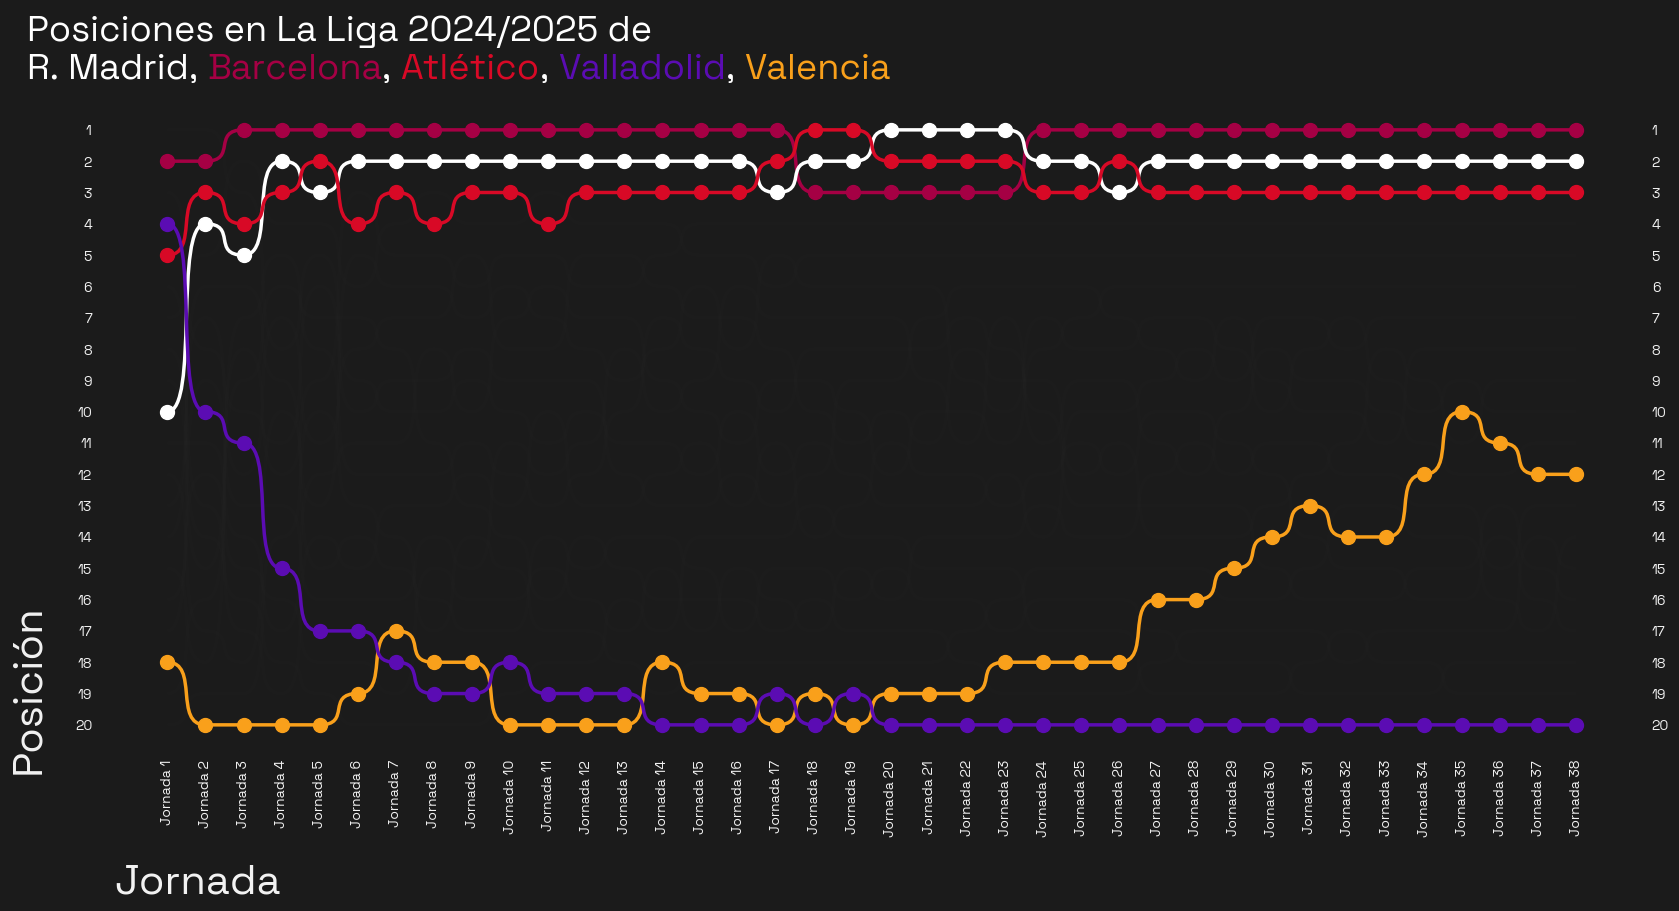

In [30]:
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 38
    values=laliga,  # values having positions for each team
    secondary_alpha=0.05,   # alpha value for non-shaded lines/markers
    highlight_dict=equipos,  # team to be highlighted with their colors
    figsize=(20, 8.5),  # size of the figure
    x_label='Jornada', y_label='Posición',  # label name
    lw=2.5,   # linewidth of the connecting lines
    fontproperties=font_normal,   # fontproperties for ticklables/labels
)

resultado = formatear_equipos(equipos)
colores_texto = obtener_colores(equipos)
texto = f"Posiciones en La Liga 2024/2025 de\n{resultado}"

fig_text(
    0.09, 0.98, texto, color='#fff',
    highlight_textprops=colores_texto,
    size=26, fig=fig, fontproperties=font_normal
)



In [31]:
colores_fpc = {
    'América de Cali': '#D50000',          # Rojo escarlata
    'Millonarios': '#005DAA',              # Azul rey
    'Atlético Junior': "#F07E82",          # Rojo brillante
    'Deportes Tolima': '#7A003C',          # Vino tinto
    'Atlético Nacional': '#007A33',        # Verde esmeralda
    'Independiente Santa Fe': '#E30613',   # Rojo intenso
    'Once Caldas': '#FFFFFF',              # Blanco puro
    'Independiente Medellín': '#00205B',   # Azul oscuro
    'Atlético Bucaramanga': '#FFCC00',     # Amarillo vibrante
    'Alianza FC': '#000000',               # Negro
    'Deportivo Pasto': '#002B7F',          # Azul profundo
    'Deportivo Pereira': '#FFD700',        # Amarillo dorado
    'Deportivo Cali': '#006633',           # Verde oscuro
    'Envigado FC': '#FF6600',              # Naranja brillante
    'La Equidad': '#009639',               # Verde brillante
    'Llaneros FC': '#8B4513',              # Marrón
    'Fortaleza CEIF': '#800080',           # Púrpura
    'Águilas Doradas': '#FFD700',          # Dorado
    'Unión Magdalena': '#0033A0',          # Azul medio
    'Boyacá Chicó': '#1E1E1E',             # Gris oscuro
}


In [32]:
tabla_fpc = pd.read_html('https://es.wikipedia.org/wiki/Torneo_Apertura_2025_(Colombia)')[10]

tabla_fpc = tabla_fpc.replace(r'\[\w+\.\s*\d+\].*', '', regex=True)

equipos_json = {}
for _, row in tabla_fpc.iterrows():
    equipo = row[0]
    datos = [int(x) for x in row[1:]]
    equipos_json[equipo] = datos

with open('equipos_fpc.json', 'w', encoding='utf-8') as f:
    json.dump(equipos_json, f, ensure_ascii=False, indent=2)

tabla_fpc

C:\Users\user\AppData\Local\Temp\ipykernel_2844\1326175599.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equipo = row[0]


Equipo Jornada                                  ...      \
                    Equipo       1   2   3   4   5   6   7   8   9  ...  11   
0          América de Cali       3   1   2   4   3   3   2   3   3  ...   1   
1              Millonarios      14   8   5   5   8   7   4   6   5  ...   4   
2                   Junior      13  12  13   6   4   9   7   4   4  ...   3   
3          Deportes Tolima       2   4   4   3   6   8  10   9   9  ...   7   
4        Atlético Nacional       1   2   1   1   2   5   3   2   2  ...   5   
5                 Santa Fe       4   5   7   7  11  14   9   8   7  ...   2   
6              Once Caldas      20  10   6   8   5   2   6  11  11  ...  10   
7   Independiente Medellín       6   3   3   2   1   1   1   1   1  ...   6   
8     Atlético Bucaramanga      18  20  20  20  20  20  19  17  17  ...  11   
9            Alianza F. C.       9  13  14  16  16  13  11  10  10  ...  12   
10         Deportivo Pasto      19  19  18  11   9   6   8   7   6  ...   8   
11       Deportivo Pereira      17  15  19  18  19  16  16  14  12  ...  13   
12          Deportivo Cali      10   6  10  10   7   4   5   5   8  ...   9   
13         Águilas Doradas       8  11  12  15  15  17  17  18  19  ...  17   
14                Llaneros      16   7   8   9  12  15  12  13  14  ...  14   
15          Fortaleza CEIF      12  16   9  12  10  11  14  15  15  ...  16   
16            Boyacá Chicó       5   9  11  14  14  12  13  12  13  ...  15   
17          Envigado F. C.      11  17  16  13  13  10  15  16  16  ...  18   
18         Unión Magdalena      15  18  17  17  17  18  18  19  18  ...  19   
19              La Equidad       7  14  15  19  18  19  20  20  20  ...  20   

                                        
    12  13  14  15  16  17  18  19  20  
0    4   4   4   5   4   1   2   1   1  
1    1   1   2   4   2   4   3   4   2  
2    2   2   3   1   3   3   4   5   3  
3    6   6   6   7   6   7   5   2   4  
4    3   3   1   2   1   2   1   3   5  
5    5   5   7   6   7   6   6   6   6  
6   10  10   8  10   9   8   8   8   7  
7    7   7   5   3   5   5   7   7   8  
8   11  11  11  11  11  13  13  10   9  
9   14  12  12  12  13  11  10  11  10  
10   9   9  10   9  10   9   9   9  11  
11  12  13  13  13  12  12  11  12  12  
12   8   8   9   8   8  10  12  13  13  
13  18  18  18  18  18  18  18  16  14  
14  11  14  14  16  16  15  16  18  15  
15  17  17  15  14  15  16  14  14  16  
16  15  15  16  17  17  17  17  15  17  
17  16  16  17  15  14  14  15  17  18  
18  19  20  19  20  20  20  20  20  19  
19  20  19  20  19  19  19  19  19  20  

[20 rows x 21 columns]

In [33]:
with open('equipos_fpc.json', 'r', encoding='utf-8') as archivo:
    fpc = json.load(archivo)


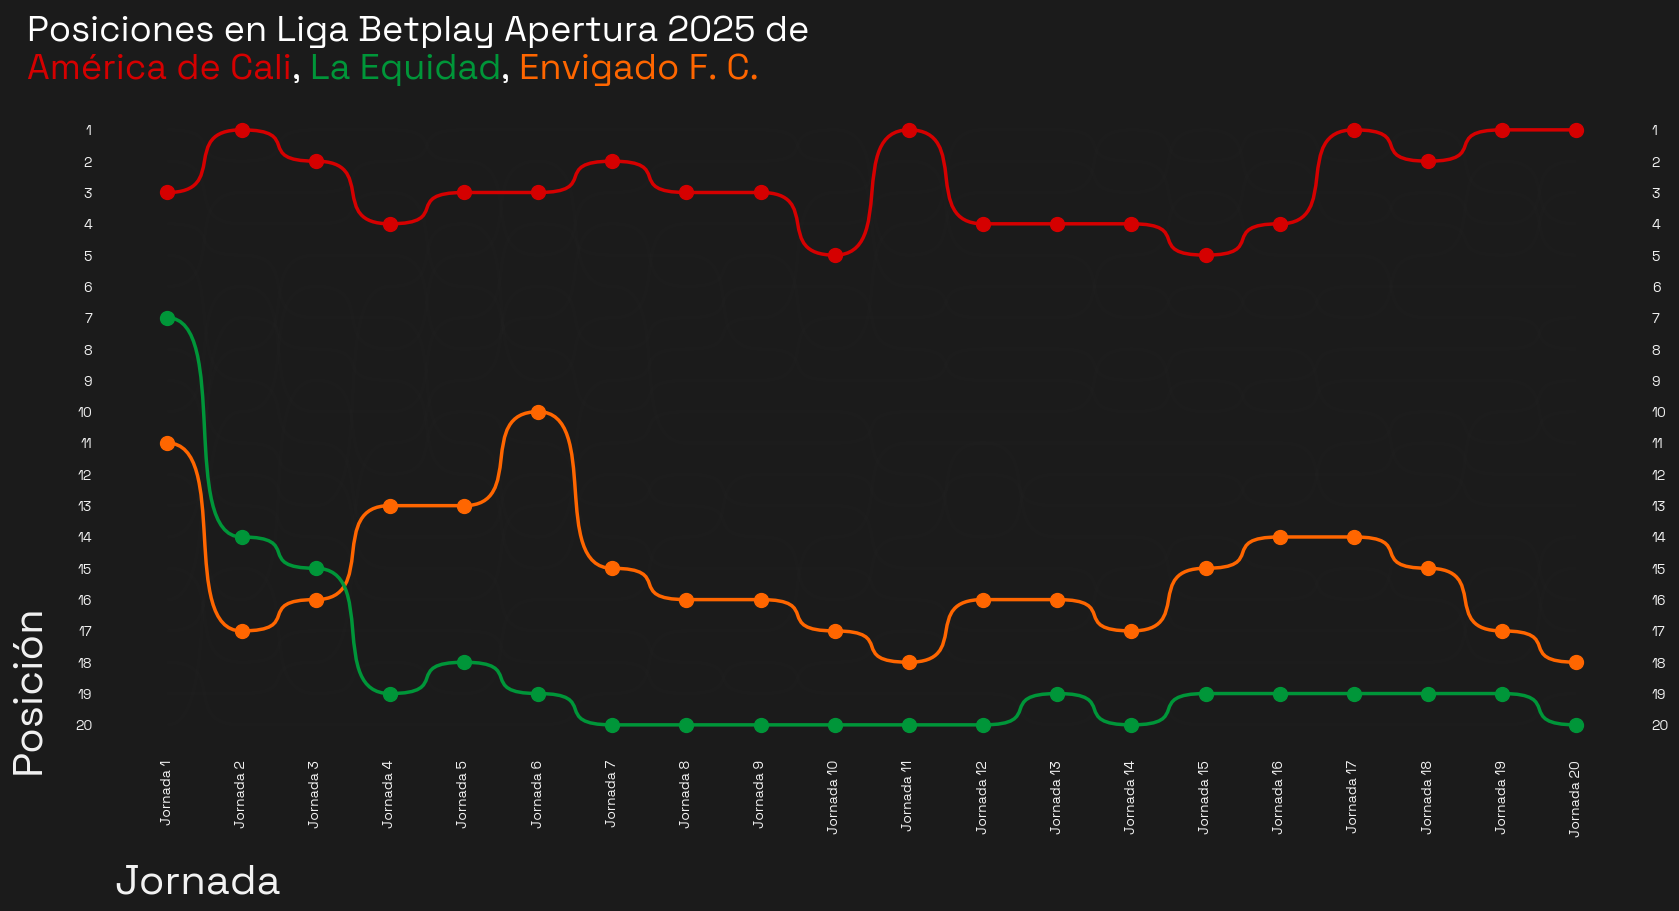

In [34]:
match_day = ["Jornada " + str(num) for num in range(1, 21)]

bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#3A3A3A",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='o',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

equipos = {
    'América de Cali': colores_fpc['América de Cali'],
    'La Equidad': colores_fpc['La Equidad'],
    'Envigado F. C.': colores_fpc['Envigado FC']
}

fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 38
    values=fpc,  # values having positions for each team
    secondary_alpha=0.05,   # alpha value for non-shaded lines/markers
    highlight_dict=equipos,  # team to be highlighted with their colors
    figsize=(20, 8.5),  # size of the figure
    x_label='Jornada', y_label='Posición',  # label name
    lw=2.5,   # linewidth of the connecting lines
    fontproperties=font_normal,   # fontproperties for ticklables/labels
)



resultado = formatear_equipos(equipos)
colores_texto = obtener_colores(equipos)
texto = f"Posiciones en Liga Betplay Apertura 2025 de\n{resultado}"

fig_text(
    0.09, 0.98, texto, color='#fff',
    highlight_textprops=colores_texto,
    size=26, fig=fig, fontproperties=font_normal
)
